### Blast hit output file formatter

Format file taking blast hits output text file and saving into csv compatible for dataframe import

Run0 format was scoping study with only id and title stored

In [131]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [37]:
DATA_PATH='/mnt/1TB_0/Data/Assembly/PRJNA602160/SRR10915173/Blastn/'
MEGAHIT='SRR10915173_Megahit_default_PCT95_E0.001.csv'
SPADES='SRR10915173_CoronaSPAdes_default_PCT95_E0.001.csv'
BLAST_OUT=DATA_PATH+'dataframes/'

In [54]:
standard_formats=[
MEGAHIT]

In [55]:
def read_file(fpath, fname):
    file = open(fpath+fname, 'r')
    data = file.read()
    file.close()
    return data

In [56]:
def replace_strings1(data):
    data=data.replace('\n', ',')
    data=data.replace('query_length ', 'query_length: ')
    data=data.replace('PREDICTED ', ' PREDICTED: ')
    return data

In [57]:
def replace_str2(data):
    #replace exach substring we want to split on so can split all at one
    split_str='*SPLIT*'
    #data=data.replace('idx:', split_str)
    data=data.replace('title:', split_str)
    data=data.replace('accession:', split_str)
    data=data.replace('hit_id:', split_str)
    data=data.replace('query_length:', split_str)
    data=data.replace('length:', split_str)
    return data

In [115]:
def sublist_data(data):
    data=data.split('id:')
    sublists=[]
    for d in data:
        dl=d.split('*SPLIT*')
        if len(dl)!=6:
            dl += ['NaN'] * (6 - len(dl))
        sublists.append(dl)
    sublists.pop(0)
    return sublists

In [116]:
def sublist_workflow(fpath, fname):
    data=read_file(fpath,fname)
    #print(data[:500])
    data=replace_strings1(data)
    data=replace_str2(data)
    sublists=sublist_data(data)
    return sublists

In [117]:
def replace_commas(df):
    df.hit_id = df.hit_id.str.replace(',', '')
    df.uid = df.uid.str.replace(',', '')
    df.accession = df.accession.str.replace(',', '')
    df.length = df.length.str.replace(',', '')
    df.query_length = df.query_length.str.replace(',', '')
    return df

In [118]:
def create_title_save(df, fpath, fname):
    #df['text_title'] = [i.replace(j, '').strip('()') for i, j in zip(df.title, df.hit_id)]
    df.to_csv(fpath+fname.split('.txt')[0]+'_df.csv', index=False)

In [119]:
#id: k141_773, title: gi|1443037137|ref|XR_003241546.1| PREDICTED: Oryza sativa Japonica Group uncharacterized LOC9266121 (LOC9266121), transcript variant X4, ncRNA, accession: XR_003241546,             hit_id: gi|1443037137|ref|XR_003241546.1|, length: 2778, query_length 321

In [120]:
def standard_workflow(fpath, fname):
    sublists=sublist_workflow(fpath, fname)
    print(sublists[1111:1113])
    df = DataFrame(sublists,columns=['uid','title','accession','hit_id','length','query_length'])
    null_columns=df.columns[df.isnull().any()]
    print(df[df.isnull().any(axis=1)][null_columns].head())
    df=replace_commas(df)
    create_title_save(df, fpath, fname)
    return df

In [121]:
for f in standard_formats:
    df=standard_workflow(DATA_PATH, f)
    print(df.head(n=2))

[[' k141_28583, ', ' gi|937901440|dbj|AP014958.1| Oryza sativa Japonica Group DNA, chromosome 2, cultivar: Nipponbare, complete sequence, ', ' AP014958,             ', ' gi|937901440|dbj|AP014958.1|, ', ' 35937250, ', ' 765,'], [' k141_10053, ', ' gi|1909942951|dbj|AP023970.1| Homo sapiens DNA, sequence_', 'NaN', 'NaN', 'NaN', 'NaN']]
Empty DataFrame
Columns: []
Index: []
            uid                                              title  \
0     k141_773    gi|1443037137|ref|XR_003241546.1| PREDICTED: ...   
1   k141_22394    gi|1443098318|ref|XM_015756467.2| PREDICTED: ...   

                    accession                               hit_id  length  \
0   XR_003241546                gi|1443037137|ref|XR_003241546.1|    2778    
1   XM_015756467                gi|1443098318|ref|XM_015756467.2|    1768    

  query_length  
0          321  
1          440  


In [122]:
df=pd.read_csv(DATA_PATH+'SRR10915173_Megahit_default_PCT95_E0.001.csv_df.csv')

In [123]:
df.head(n=60)

,uid,title,accession,hit_id,length,query_length
0,k141_773,gi|1443037137|ref|XR_003241546.1| PREDICTED: ...,XR_003241546,gi|1443037137|ref|XR_003241546.1|,2778.0,321.0
1,k141_22394,gi|1443098318|ref|XM_015756467.2| PREDICTED: ...,XM_015756467,gi|1443098318|ref|XM_015756467.2|,1768.0,440.0
2,k141_14674,gi|937906879|dbj|AP014959.1| Oryza sativa Jap...,AP014959,gi|937906879|dbj|AP014959.1|,36413819.0,375.0
3,k141_15446,gi|1189419119|gb|CP018161.1| Oryza sativa Ind...,CP018161,gi|1189419119|gb|CP018161.1|,31237231.0,489.0
4,k141_30114,gi|1443091465|ref|XM_015792241.2| PREDICTED: ...,XM_015792241,gi|1443091465|ref|XM_015792241.2|,3929.0,468.0
5,k141_17762,gi|1443043362|ref|XM_015755272.2| PREDICTED: ...,XM_015755272,gi|1443043362|ref|XM_015755272.2|,2855.0,554.0
6,k141_0,gi|1443078662|ref|XM_015784981.2| PREDICTED: ...,XM_015784981,gi|1443078662|ref|XM_015784981.2|,3009.0,312.0
7,k141_16218,gi|1443036353|ref|XM_015766054.2| PREDICTED: ...,XM_015766054,gi|1443036353|ref|XM_015766054.2|,2278.0,583.0
8,k141_23166,gi|1189419125|gb|CP018167.1| Oryza sativa Ind...,CP018167,gi|1189419125|gb|CP018167.1|,31778392.0,679.0
9,k141_15447,gi|937940524|dbj|AP014968.1| Oryza sativa Jap...,AP014968,gi|937940524|dbj|AP014968.1|,27531856.0,438.0


In [124]:
sorted_df = df.sort_values(by='length')
sorted_df.head()

,uid,title,accession,hit_id,length,query_length
706,k141_23204,gi|1092960231|ref|XM_018891215.1| Fusarium ve...,XM_018891215,gi|1092960231|ref|XM_018891215.1|,237.0,323.0
10643,unplaced_0366,"AP023851,",gi|1909942832|dbj|AP023851.1|,27895,305.0,NaN
15733,unplaced_0123,"AP023608,",gi|1909942589|dbj|AP023608.1|,78872,307.0,NaN
12355,unplaced_0002,"AP023487,",gi|1909942468|dbj|AP023487.1|,1363445,309.0,NaN
5669,unplaced_0193,"AP023678,",gi|1909942659|dbj|AP023678.1|,54366,313.0,NaN


In [128]:
titles=df.title.to_list()

In [129]:
seqs, counts = np.unique(titles, return_counts=True)

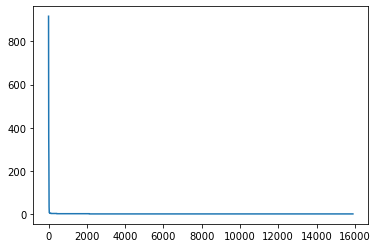

In [132]:
counts, seqs = zip(*sorted(zip(counts, seqs), reverse=True))
plt.plot(counts)

In [133]:
counts[:10]

(916, 790, 747, 501, 481, 451, 441, 395, 374, 370)

In [134]:
seqs

(' gi|937893927|dbj|AP014957.1| Oryza sativa Japonica Group DNA, chromosome 1, cultivar: Nipponbare, complete sequence, ',
 ' gi|937906879|dbj|AP014959.1| Oryza sativa Japonica Group DNA, chromosome 3, cultivar: Nipponbare, complete sequence, ',
 ' gi|937901440|dbj|AP014958.1| Oryza sativa Japonica Group DNA, chromosome 2, cultivar: Nipponbare, complete sequence, ',
 ' gi|937912581|dbj|AP014960.1| Oryza sativa Japonica Group DNA, chromosome 4, cultivar: Nipponbare, complete sequence, ',
 ' gi|937916895|dbj|AP014961.1| Oryza sativa Japonica Group DNA, chromosome 5, cultivar: Nipponbare, complete sequence, ',
 ' gi|937920774|dbj|AP014962.1| Oryza sativa Japonica Group DNA, chromosome 6, cultivar: Nipponbare, complete sequence, ',
 ' gi|937924750|dbj|AP014963.1| Oryza sativa Japonica Group DNA, chromosome 7, cultivar: Nipponbare, complete sequence, ',
 ' gi|1189419122|gb|CP018164.1| Oryza sativa Indica Group cultivar Shuhui498 chromosome 8 sequence, ',
 ' gi|937934639|dbj|AP014966.1| Oryz

Hits excluding oryza sativa rice

In [139]:
not_oryza_sativa= [x for x in titles if 'oryza sativa' not in x.lower()]

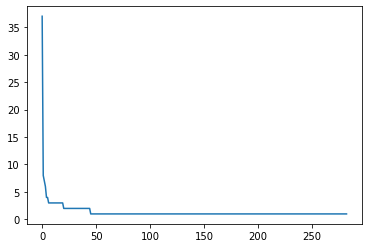

In [140]:
seqs_nr, counts_nr= np.unique(not_oryza_sativa, return_counts=True)
counts_nr, seqs_nr = zip(*sorted(zip(counts_nr, seqs_nr), reverse=True))
plt.plot(counts_nr)

In [141]:
seqs_nr

(' gi|1834501344|emb|LR794155.1| Oryza rufipogon mitochondrion genomic DNA containing atp6-orf153-rps13-rps4-orf176-atp9-rrn18-rrn5-orf187-orf152b-orf161-cox2-orf79 region, haplotype NA3-orf79, strain W1757, ',
 ' gi|1238280724|gb|KY962518.1| Homo sapiens external transcribed spacer 18S ribosomal RNA gene, internal transcribed spacer 1, 5.8S ribosomal RNA gene, internal transcribed spacer 2, 28S ribosomal RNA gene, and external transcribed spacer, complete sequence, ',
 ' gi|1212788596|gb|MF164268.1| Homo sapiens clone BAC JH12 genomic sequence, ',
 ' gi|1548994296|gb|CP034500.1| Eukaryotic synthetic construct chromosome 21 >gi|1549098691|gb|CP034525.1| Eukaryotic synthetic construct chromosome 21, ',
 ' gi|685042446|emb|LN590971.1| Cyprinus carpio genome assembly common carp genome ,scaffold 000000985, ',
 ' gi|1407510847|gb|MH377758.1| Oryza rufipogon isolate G103 fertility-related ORF3 protein gene, complete cds, ',
 ' gi|761231605|gb|KM881639.1| Oryza glaberrima isolate 101328 chlo